In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

In [5]:
books_df =pd.read_csv('book_data.csv', encoding = 'utf-8')
books_df

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...
...,...,...,...,...,...,...,...,...,...,...,...,...
54296,Howard Megdal,"In this fearless and half-crazy story, Howard ...",NaN,Hardcover,9.78161E+12,256 pages,3.37,27,9,Taking the Field: A Fan's Quest to Run the Tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...
54297,Howard Megdal,From the icons of the game to the players who ...,NaN,Hardcover,9.78006E+12,256 pages,3.97,34,5,"The Baseball Talmud: Koufax, Greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...
54298,Howard Megdal,NaN,NaN,Kindle Edition,NaN,NaN,3.66,32,3,"Wilpon's Folly - The Story of a Man, His Fortu...",Sports|Baseball|Abandoned,https://images.gr-assets.com/books/1394277097l...
54299,Mimi Baird|Eve Claxton,"Soon to be a major motion picture, from Brad P...",NaN,Hardcover,9.7808E+12,272 pages,3.82,867,187,He Wanted the Moon: The Madness and Medical Ge...,Nonfiction|Autobiography|Memoir|Biography|Psyc...,https://images.gr-assets.com/books/1403192135l...


### From initial EDA the bookset needs to be cleaned
* Some books have the same title and author so those will be removed
* There are also foreign language books so those will be removed as well

In [8]:
from langdetect import detect
def remove_non_english(text):
    try:
        lang = detect(text)
        if lang == 'en':
            result = text
        else:
            result = None
    except:
        result = text
    return result

In [9]:
books_df =pd.read_csv('book_data.csv', encoding = 'utf-8')
books_df['book_title'] = books_df['book_title'].str.lower()
books_df[['author1']] = books_df['book_authors'].apply(lambda x: pd.Series(''.join(x.split('|')[0:1])))
books_df['book_desc'] = books_df['book_desc'].apply(remove_non_english)
books_df.dropna(subset=['book_desc','book_title'],inplace=True)


In [ ]:
books_df.drop_duplicates(subset=['book_title','author1'],inplace=True)

In [ ]:
books_df.reset_index(drop=True)

In [3]:
book_info_df = pd.read_pickle('book_info.pkl')

## Create a book dataframe that will be easier to merge with movie dataset
* Do this by changing the titles of some of the columns of the book dataset and sropping some others

In [32]:
 book_df = pd.DataFrame(columns=['title','title_id/book_isbn','genres','release_date','plot/book_desc','year_of_release','author/director','isBook','isMovie'])

In [40]:
book_df['title'] = books_df['book_title']
book_df['title_id/book_isbn'] = books_df['book_isbn'] 
book_df['genres']= books_df['genres'].str.replace("|",",")
book_df['plot/book_desc'] = books_df['book_desc']
book_df['isBook']=1
book_df['isMovie']=0
book_df['author/director']=books_df['book_authors'].str.replace("|",",")

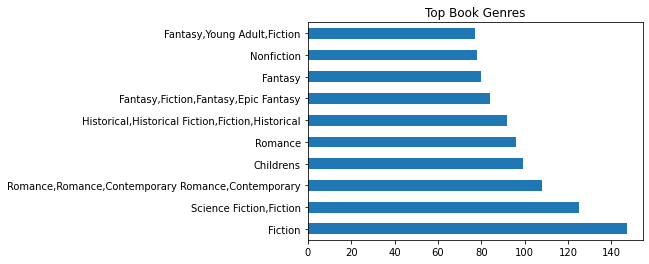

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
book_info_df.genres.value_counts().sort_values()
top_genres = book_info_df[::-1][:10]
top_genres
plt.title('Top Book Genres')
book_info_df.genres.value_counts().sort_values()[::-1][:10].plot(kind='barh');

In [21]:
list(book_info_df[book_info_df.title=='the hunger games']['plot/book_desc'])

["Winning will make you famous. Losing means certain death.The nation of Panem, formed from a post-apocalyptic North America, is a country that consists of a wealthy Capitol region surrounded by 12 poorer districts. Early in its history, a rebellion led by a 13th district against the Capitol resulted in its destruction and the creation of an annual televised event known as the Hunger Games. In punishment, and as a reminder of the power and grace of the Capitol, each district must yield one boy and one girl between the ages of 12 and 18 through a lottery system to participate in the games. The 'tributes' are chosen during the annual Reaping and are forced to fight to the death, leaving only one survivor to claim victory.When 16-year-old Katniss's young sister, Prim, is selected as District 12's female representative, Katniss volunteers to take her place. She and her male counterpart Peeta, are pitted against bigger, stronger representatives, some of whom have trained for this their whol

In [41]:
book_df.to_pickle('book_info.pkl')

In [17]:
stopwords = nltk.corpus.stopwords.words('english')
spanish_stopwords = nltk.corpus.stopwords.words('spanish')
french_stopwords = nltk.corpus.stopwords.words('french')
stopwords.extend(spanish_stopwords)
stopwords.extend(french_stopwords)
stop_words=set(stopwords)

In [18]:
corpus = books_df['book_desc']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TreebankWordTokenizer
from autocorrect import Speller

class NLPPipe:
   
    def __init__(self, vectorizer=CountVectorizer(), tokenizer=None, cleaning_function=None, 
                 lemmatizer=None,model=None):
        if not tokenizer:
            tokenizer = self.splitter
        if not cleaning_function:
            cleaning_function = self.clean_text
        self.lemmatizer = lemmatizer
        self.tokenizer = tokenizer
        self.model = model
        self.cleaning_function = cleaning_function
        self.vectorizer = vectorizer
        self._is_fit = False
        
    def splitter(self, text):
        return text.split(' ')
        
 
    
    def fit_transform(self, text):
        clean_text = self.cleaning_function(text, self.tokenizer, self.lemmatizer)
        return self.vectorizer.fit_transform(clean_text)

In [20]:
def clean_text(text, tokenizer, lemmatizer):
        cities =  {"New York":"New_York",
        'Los Angeles':'Los_Angeles',
        'Hong Kong':'Hong_Kong',
        'San Fransisco':'San_Fransisco',
        'New Delhi':'New_Delhi',
        'Sao Paulo':'Sao_Paulo',
         'Mexico City':'Mexico_City'}
        text=text.str.replace(r'\d+','')
        text=text.replace(r'[^A-Za-z0-9 ]+', '', regex=True)
        cleaned_text = []
        for post in text:
            for key in cities.keys():
                if key in post:
                    post = post.replace(key, cities[key])
            post = post.replace('World War II','WWII')
            cleaned_words = []
            for word in tokenizer(post):
                low_word = word.lower()
                if lemmatizer:
                    low_word = lemmatizer.lemmatize(low_word)
                cleaned_words.append(low_word)
            cleaned_text.append(' '.join(cleaned_words))
        return cleaned_text

In [21]:
nlp = NLPPipe(vectorizer=CountVectorizer(stop_words = stop_words,max_df=0.5,ngram_range=(1,2)), 
              cleaning_function=clean_text, 
              tokenizer=TreebankWordTokenizer().tokenize,
              lemmatizer = WordNetLemmatizer())

count_result = nlp.fit_transform(corpus)

In [22]:
from sklearn.decomposition import NMF
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(count_result)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [23]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [24]:
display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 10)


Topic  0
new, time, family, year, first, novel, new_york, author, young, bestselling

Topic  1
spiritus, novel, mundi, spiritus mundi, world, read, robert, united, global, sartorius

Topic  2
wa, would, year, could, first, man, never, knew, made, didnt

Topic  3
book, series, author, read, reader, work, time, first, people, also

Topic  4
life, family, living, people, live, woman, change, year, way, dream

Topic  5
story, tale, short, novel, tell, short story, first, collection, character, young

Topic  6
one, man, day, night, ever, two, another, year, woman, one thing

Topic  7
love, woman, family, man, heart, fall, young, two, never, find

Topic  8
shes, know, find, get, friend, want, like, thing, make, girl

Topic  9
world, human, power, war, must, people, find, magic, dark, ancient


In [ ]:
first, novel, author, young, bestselling

In [25]:
nlp = NLPPipe(vectorizer=CountVectorizer(stop_words = stop_words,min_df=0.01,ngram_range=(1,2)), 
              cleaning_function=clean_text, 
              tokenizer=TreebankWordTokenizer().tokenize,
              lemmatizer = WordNetLemmatizer())

count_result = nlp.fit_transform(corpus)

In [26]:
nmf_model = NMF(10)
doc_topic = nmf_model.fit_transform(count_result)

In [27]:
display_topics(nmf_model, nlp.vectorizer.get_feature_names(), 10)


Topic  0
new, family, find, year, young, secret, woman, father, must, home

Topic  1
book, series, author, new, read, reader, work, also, first, people

Topic  2
wa, would, year, could, man, first, never, knew, made, didnt

Topic  3
life, living, people, live, change, dream, way, god, woman, day

Topic  4
world, novel, human, war, power, people, history, united, earth, new

Topic  5
story, tale, novel, short, tell, first, short story, collection, american, young

Topic  6
one, man, day, night, two, ever, year, another, last, work

Topic  7
love, woman, heart, man, fall, never, romance, novel, two, love story

Topic  8
shes, know, get, want, friend, thing, like, make, find, way

Topic  9
time, new_york, first, new_york time, bestselling, author, time bestselling, bestselling author, series, year
